# Data Science und Entscheidungsbäume

## 1. Pandas
Ein weiteres Paket, das wir häufig verwenden werden, ist `pandas`. Dieses führt das Data Frame als zentrale Datenstruktur ein. Ein Data Frame ist eine Tabelle, wobei einzelne Spalten über Spaltennamen angesprochen werden können. Pandas bietet viele nützliche Möglichkeiten, auf Data Frames zuzugreifen. 

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("iris.csv")

df

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


### Auswahl von Zeilen / Spalten
Mit pandas können wir leicht bestimmte Zeilen oder Spalten in einem Data Frame auswählen. Eine Möglichkeit ist die Auswahl über den Namen der Spalte:

In [230]:
accx = df.loc[:,"SepalLength"]
accx

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLength, Length: 150, dtype: float64

Hierbei steht `:` für "wähle alle Zeilen aus". Wenn nur eine einzelne Spalte zurückgegeben wird, ist das Ergebnis vom Typ `Series`, ansonsten ist das Ergebnis wieder ein Data Frame. Spalten können auch über den Index zugegriffen werden:

In [231]:
acc = df.iloc[:,1:4]
acc

,SepalLength,SepalWidth,PetalLength
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


Äquivalent kann auf die Zeilen zugegriffen werden. Der folgende Ausdruck liefert beispielsweise nur die ersten 5 Zeilen:

In [232]:
df.iloc[0:5,:]

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


Natürlich können wir auch beides kombinieren, z.B. so:

In [233]:
df.loc[0:5,["SepalLength", "SepalWidth"]]

,SepalLength,SepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9


Eine weitere Möglichkeit ist, Zeilen (oder Spalten) über bool'sche Ausdrücke zuzugreifen. Beispielsweise liefert folgender Ausdruck alle Zeilen, in denen der Wert von `SepalLength` kleiner als 5 ist:

In [234]:
df.loc[df.SepalLength < 5,:]

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
6,6,4.6,3.4,1.4,0.3,Iris-setosa
8,8,4.4,2.9,1.4,0.2,Iris-setosa
9,9,4.9,3.1,1.5,0.1,Iris-setosa
11,11,4.8,3.4,1.6,0.2,Iris-setosa
12,12,4.8,3.0,1.4,0.1,Iris-setosa
13,13,4.3,3.0,1.1,0.1,Iris-setosa
22,22,4.6,3.6,1.0,0.2,Iris-setosa


### Einfügen neuer Werte
Das schreiben neuer Werte in ein Data Frame ist ebenso leicht möglich. Der folgende Ausdruck setzt alle Werte der Spalte `SepalLength`, die kleiner als 5 sind, auf den Wert 0.

In [235]:
df.loc[df.SepalLength < 0,"SepalLength"] = 0
df

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


## 2. Entscheidungsbäume in Python
Trainieren Sie einen Entscheidungsbaum auf den Iris-Daten. Verwenden Sie 2/3 der Daten zum Trainieren, und 1/3 der Daten zum Testen. Welche Genauigkeit können Sie erreichen?

0.9292929292929293


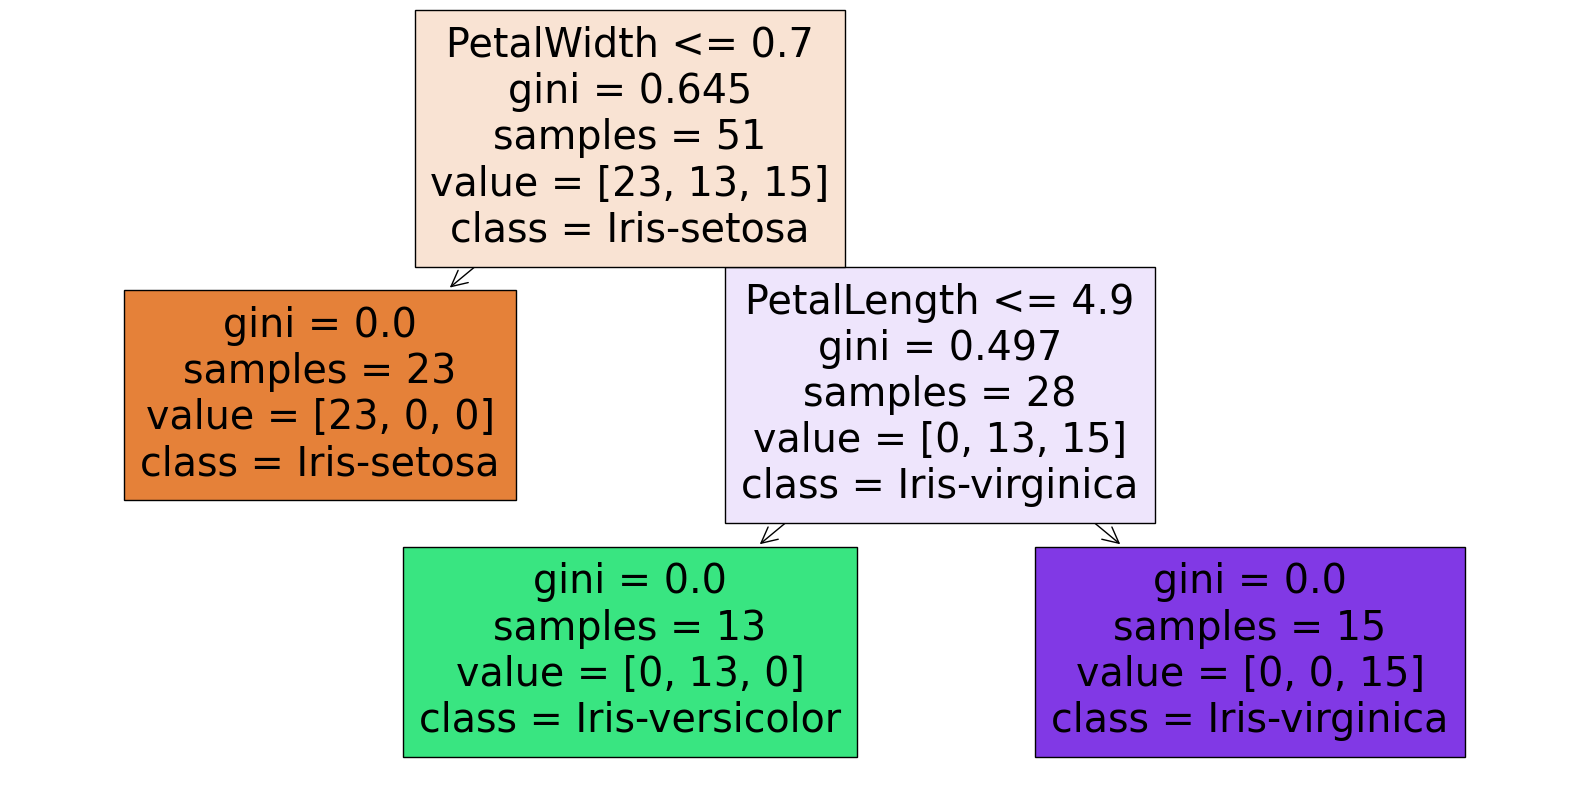

In [236]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:5]
y = df.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.66, random_state=48)

t = tree.DecisionTreeClassifier()
t.fit(X_train,y_train)
pred = t.predict(X_test)

print(np.mean(pred == y_test))

plt.figure(figsize=(20, 10))
tree.plot_tree(t, feature_names=X.columns, class_names=t.classes_, filled=True)
plt.show()

# Evaluation von Klassifikatoren

 Häufig möchte man eine feste Aufteilung in Trainings- und Validierungsdaten vermeiden (die Validierungs-Performance soll nicht von der Wahl der Daten-Aufteilung abhängen). Außerdem möchte man möglichst viele Daten zum Training benutzen. Diese Ziele lasssen sich mit einer Kreuzvalidierung erreichen:
Dabei werden die Daten $S$ in die Teilmengen $S_i,\dots,S_n$ aufgeteilt. In Lauf $i$ wird $S \setminus S_i$ als Trainingsdaten und $S_i$ als Validierungsdaten verwendet. Die Klassifikationsgüte ist die durchschnittliche Klassifikationsgüte jedes Laufs. 
 
## Aufgabe 1
* Implementieren Sie die Funktion `cv(clf,features,classes,n)`, die eine n-fache Kreuzvalidierung mit dem jeweiligen Klassifikator durchführt und die mittlere Accuracy zurückgibt. 
* Klassifizieren Sie den Pima-Datensatz. Verwenden Sie dazu einen Entscheidungsbaum. Welcher Klassifikator liefert das bessere Ergebnis?

## Aufgabe 2

In Scipy sind verschiedene Klassifikatoren bereits implementiert. Im Folgenden sollen die Klassifikatoren miteinander verglichen werden. Vergleichen Sie die folgenden Klassifikatoren mit 10-fold CV anhand der Accuracy:  Decision Trees, Lineare Diskriminantenanalyse, Quadratische Diskriminantenanalyse, Support Vector Machine, sowie das neuronale Netz aus Übung 6.1b.